In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDRegressor
from gym import wrappers
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# RBF Networks

In [6]:
class FeatureTransformer:
    def __init__(self, env):
        observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
        scaler = StandardScaler()
        scaler.fit(observation_examples)
        # ba in hyper ha check ta kodom behtarin
        featurizer = FeatureUnion([
            ('rbf1', RBFSampler(gamma=5, n_components=500)),
            ('rbf2', RBFSampler(gamma=2, n_components=500)),
            ('rbf3', RBFSampler(gamma=1, n_components=500)),
            ('rbf4', RBFSampler(gamma=.5, n_components=500)),
        ])
        featurizer.fit(scaler.transform(observation_examples))
        self.scaler = scaler
        self.featurizer = featurizer
    
    def transform(self, observations):
        scaled = self.scaler.transform(observations)
        return self.featurizer.transform(scaled)

In [7]:
class Model:
    def __init__(self, env, feature_transformer, learning_rate):
        self.env = env
        self.models = []
        self.feature_transformer = feature_transformer
        for i in range(env.action_space.n):
            model = SGDRegressor(learning_rate=learning_rate)
            model.partial_fit(feature_transformer.transform([env.reset()]), [0])
            self.models.append(model)
    
    def predict(self, s):
        X = self.feature_transformer.transform([s])
        return np.array([m.predict(X)[0] for m in self.models])
    
    def update(self, s, a, G):
        X = self.feature_transformer.transform([s])
        self.models[a].partial_fit(X, [G])
        
    def sample_action(self, s, eps):
        if np.random.random() < eps:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.predict(s))
        
    def play_one(self, model, eps, gamma):
        observation = env.reset()
        done = False
        totalreward = 0
        iters = 0
        while not done and iters < 10000:
            action = model.sample_action(observation, eps)
            prev_observation = observation
            observation, reward, done, info = env.step(action)
            
            G = reward + gamma*np.max(model.predict(observation)[0])
            model.update(prev_observation, action, G)
            
            totalreward += reward
            iters += 1
        return totalreward
    
    def plot_cost_to_go(self, env, estimator, num_titles=20):
        x = np.linspace(env.observation_space.low[0], env.observation_space.high[0])
        y = np.linspace(env.observation_space.low[1], env.observation_space.high[1])
        X, Y = np.meshgrid(x, y)
        Z = np.apply_along_axis(lambda _: -np.max(estimator.predict(_)), 2, np.dstack([X, Y]))
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, vmin=-1, vmax=1)
        ax.set_xlabel('Position')
        ax.set_ylabel('Velocity')
        ax.set_zlabel('Cost to go')
        ax.set_title('Cost to go function')
        fig.colorbar(surf)
        plt.show()
        
    def plot_running_avg(self, totalrewards):
        N = len(totalrewards)
        running_avg = np.empty(N)
        for t in range(N):
            running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
        plt.plot(running_avg)
        plt.title("Running Average")
        
    

        
        
        

C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


episode: 0 total reward -200.0
episode: 1 total reward -200.0
episode: 2 total reward -200.0
episode: 3 total reward -200.0
episode: 4 total reward -200.0
episode: 5 total reward -200.0
episode: 6 total reward -200.0
episode: 7 total reward -200.0
episode: 8 total reward -200.0
episode: 9 total reward -200.0
episode: 10 total reward -200.0
episode: 11 total reward -200.0
episode: 12 total reward -200.0
episode: 13 total reward -200.0
episode: 14 total reward -200.0
episode: 15 total reward -200.0
episode: 16 total reward -200.0
episode: 17 total reward -200.0
episode: 18 total reward -200.0
episode: 19 total reward -200.0
episode: 20 total reward -200.0
episode: 21 total reward -200.0
episode: 22 total reward -200.0
episode: 23 total reward -200.0
episode: 24 total reward -200.0
episode: 25 total reward -200.0
episode: 26 total reward -200.0
episode: 27 total reward -200.0
episode: 28 total reward -200.0
episode: 29 total reward -169.0
episode: 30 total reward -200.0
episode: 31 total 

episode: 253 total reward -159.0
episode: 254 total reward -154.0
episode: 255 total reward -150.0
episode: 256 total reward -90.0
episode: 257 total reward -89.0
episode: 258 total reward -93.0
episode: 259 total reward -86.0
episode: 260 total reward -149.0
episode: 261 total reward -165.0
episode: 262 total reward -88.0
episode: 263 total reward -148.0
episode: 264 total reward -147.0
episode: 265 total reward -159.0
episode: 266 total reward -155.0
episode: 267 total reward -89.0
episode: 268 total reward -148.0
episode: 269 total reward -93.0
episode: 270 total reward -152.0
episode: 271 total reward -88.0
episode: 272 total reward -92.0
episode: 273 total reward -87.0
episode: 274 total reward -164.0
episode: 275 total reward -148.0
episode: 276 total reward -90.0
episode: 277 total reward -170.0
episode: 278 total reward -153.0
episode: 279 total reward -91.0
episode: 280 total reward -153.0
episode: 281 total reward -154.0
episode: 282 total reward -150.0
episode: 283 total rew

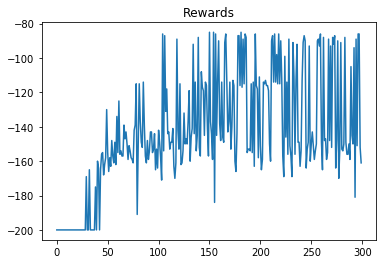

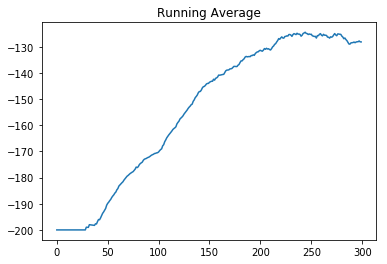

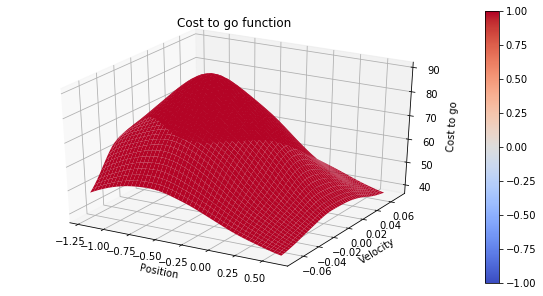

In [8]:
env = gym.make('MountainCar-v0')
ft = FeatureTransformer(env)
model = Model(env, ft, "constant")
gamma = 0.99
N = 300
totalrewards = np.empty(N)
for n in range(N):
    eps =0.1*(0.97**n)
    totalreward = model.play_one(model, eps, gamma)
    totalrewards[n] = totalreward
    print("episode:", n, "total reward", totalreward)
print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", -totalrewards.sum())

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

model.plot_running_avg(totalrewards)
model.plot_cost_to_go(env, model)